<a href="https://colab.research.google.com/github/garvitanand2/Data-Science/blob/master/MNIST_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LEARNING IMAGE CLASSIFICATION USING MNIST DATASET**


In [0]:
# Importing the tensorflow library
import tensorflow as tf 
# Downloading the mnist data set 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


8


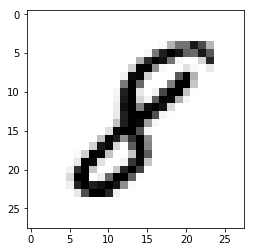

In [14]:
#importing the matplotlib for plotting of data
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000

print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [19]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [21]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0619 14:47:29.029116 140092070242176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0619 14:47:29.053514 140092070242176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0619 14:47:29.330248 140092070242176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 45s 743us/step - loss: 0.2073 - acc: 0.9380
Epoch 2/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.0839 - acc: 0.9748
Epoch 3/10
60000/60000 [==============================] - 43s 718us/step - loss: 0.0604 - acc: 0.9812
Epoch 4/10
60000/60000 [==============================] - 44s 726us/step - loss: 0.0463 - acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.0364 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 43s 724us/step - loss: 0.0295 - acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 44s 727us/step - loss: 0.0281 - acc: 0.9906
Epoch 8/10
60000/60000 [==============================] - 43s 717us/step - loss: 0.0214 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.0210 - acc: 0.9927
Epoch 10/10
60000/60000 [==============================] - 43s 719us/step - loss: 

In [25]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 193us/step


[0.06399218491524589, 0.9845]

2


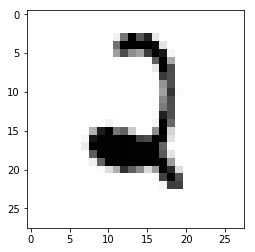

In [28]:
image_index = 4445
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())